In [1]:
#Imports
import numpy as np
from numpy import arange
from random import random
from pylab import (plot, xlabel, ylabel, show)

In [2]:
#Problem 1 Function
def deal(chosen_door, change_door = False):   
    doors = [0, 0, 0]
    prize_index = np.random.randint(0,3)
    doors[prize_index] = 1
    

    for door_to_open, door in enumerate(doors):
        if (door == 0) and (door_to_open != chosen_door):
            revealed_door = door_to_open
        
    

    complete_set = {0, 1, 2}
    chosen_revealed_set = {chosen_door, revealed_door}
    switch_list = list(complete_set - chosen_revealed_set)
    switch_door = switch_list[0]


    if change_door == False:
        retval = doors[chosen_door]
    else:
        retval = doors[switch_door]

    return(retval)


In [3]:
#Problem 1 Main
i = 0
max_iter = 1000

no_change = []
change_choice = []

while i < max_iter:
    no_change.append(deal(np.random.randint(0, 3)))
    change_choice.append(deal(np.random.randint(0, 3), change_door= True))
    i += 1

stay_win = round(100 * (np.sum(no_change) / max_iter), 1)
change_win = round(100 * (np.sum(change_choice) / max_iter), 1)

print('Stay win rate: ' + str(stay_win) + '%')
print('Change win rate: ' + str(change_win) + '%')

Stay win rate: 36.1%
Change win rate: 67.2%


In [4]:
#Problem 2 Function
def ProbCalc(t, thalf):
    temp = -(t / thalf)
    retval = 1 - (2**temp)
    return(retval)


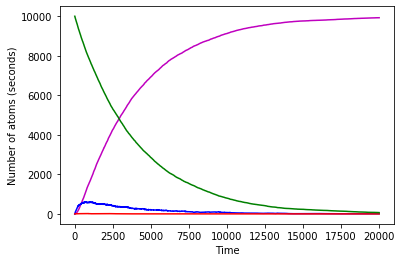

In [5]:
#Problem 2 Main
N209Bi = 0

NPb = 0
Pb_half = 3.3 * 60

NTl = 0
Tl_half = 2.2 * 60

NBi = 10000
Bi_half = 46 * 60

tstep = 1.0
pPb = ProbCalc(tstep, Pb_half)
pTl = ProbCalc(tstep, Pb_half)
pBi = ProbCalc(tstep, Bi_half)

tmax = 20000
tpoints = arange(0.0, tmax, tstep)

Bi209_points = []
Pb_points = []
Tl_points = []
Bi_points = []

for t in tpoints:
    Bi209_points.append(N209Bi)
    Pb_points.append(NPb)
    Tl_points.append(NTl)
    Bi_points.append(NBi)
    
    
    for i in range(NBi):
        Bi_decay = 0
        if random() < pBi:
            Bi_decay += 1
        
        temp = random()
        if temp > 0.9791:
            NBi -= Bi_decay
            NTl += Bi_decay
        else:
            NBi -= Bi_decay
            NPb += Bi_decay

    Tl_decay = 0
    for i in range(NTl):
        if random() < pTl:
            Tl_decay +=1
    NTl -= Tl_decay
    NPb += Tl_decay

    Pb_decay = 0
    for i in range(NPb):
        if random() < pPb:
            Pb_decay += 1

    NPb -= Pb_decay
    N209Bi += Pb_decay


    
# Make the graph
plot(tpoints, Bi209_points, c='m')
plot(tpoints, Pb_points, c='b')
plot(tpoints, Tl_points, c='r')
plot(tpoints, Bi_points, c='g')
xlabel("Time")
ylabel("Number of atoms (seconds)")
show()